[![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joserdf/GA-030_Estatistica/blob/main/Trab1_2024-4_Jose-Renato.ipynb)

# import and load data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon, binom, chi2

In [ ]:
arquivos = ["data/data1q.dat.gz", "data/data1x.dat.gz", "data/data1y.dat.gz", "data/data1t.dat.gz"]

for arquivo in arquivos:
    if os.path.exists(arquivo):
        pass
    else:
        print(f"O arquivo {arquivo} não existe. Baixando do repositório do GitHub...")
        url = f"https://github.com/joserdf/GA-030_Estatistica/raw/main/{arquivo}"
        os.system(f"wget -P data {url}")
        print(f"O arquivo {arquivo} foi baixado com sucesso.")
        print("===============================================")

if all(os.path.exists(arquivo) for arquivo in arquivos):
    data_q = np.loadtxt("data/data1q.dat.gz")
    data_x = np.loadtxt("data/data1x.dat.gz")
    data_y = np.loadtxt("data/data1y.dat.gz")
    data_t = np.loadtxt("data/data1t.dat.gz")
    print("Dados carregados com sucesso.")

# Trabalho

### (a) Cálculo da Expectância e Variância Teóricas

### Fórmulas para Expectância e Variância Teóricas

1. Distribuição Normal $Q \sim N(\mu, \sigma^2)$
    - Expectância: $\mathbb{E}[Q] = \mu$
    - Variância: $\text{Var}(Q) = \sigma^2$

2. Distribuição Uniforme $X \sim U(a, b)$
    - Expectância: $\mathbb{E}[X] = \frac{a + b}{2}$
    - Variância: $\text{Var}(X) = \frac{(b - a)^2}{12}$

3. Distribuição Exponencial $Y \sim \text{Exp}(\lambda)$
    - Expectância: $\mathbb{E}[Y] = \frac{1}{\lambda}$
    - Variância: $\text{Var}(Y) = \frac{1}{\lambda^2}$

4. Distribuição Binomial $T \sim B(n, p)$
    - Expectância: $\mathbb{E}[T] = n \cdot p$
    - Variância: $\text{Var}(T) = n \cdot p \cdot (1 - p)$

In [8]:
# Cálculo das expectativas e variâncias teóricas
# Normal Q ~ N(0, 2)
E_Q = 0
Var_Q = 2

# Uniforme X ~ U[-1, 1]
a = -1
b = 1
E_X = (a + b) / 2
Var_X = (b - a)**2 / 12

# Exponencial Y ~ E(lambda = 0.05)
lambda_Y = 0.05
E_Y = 1 / lambda_Y
Var_Y = 1 / (lambda_Y**2)

# Binomial T ~ B(15, 0.40)
n_T = 15
p_T = 0.40
E_T = n_T * p_T
Var_T = n_T * p_T * (1 - p_T)

# Resultados
print("Cálculos Teóricos:")
print("Para a variável Q ~ N(0, 2):")
print(f"  Expectância (E[Q]) = {E_Q}")
print(f"  Variância (Var[Q]) = {Var_Q}")
print()

print("Para a variável X ~ U[-1, 1]:")
print(f"  Expectância (E[X]) = {E_X}")
print(f"  Variância (Var[X]) = {round(Var_X, 3)}")
print()

print("Para a variável Y ~ E(lambda = 0.05):")
print(f"  Expectância (E[Y]) = {int(E_Y)}")
print(f"  Variância (Var[Y]) = {round(Var_Y)}")
print()

print("Para a variável T ~ B(15, 0.40):")
print(f"  Expectância (E[T]) = {int(E_T)}")
print(f"  Variância (Var[T]) = {round(Var_T, 1)}")

Cálculos Teóricos:
Para a variável Q ~ N(0, 2):
  Expectância (E[Q]) = 0
  Variância (Var[Q]) = 2

Para a variável X ~ U[-1, 1]:
  Expectância (E[X]) = 0.0
  Variância (Var[X]) = 0.333

Para a variável Y ~ E(lambda = 0.05):
  Expectância (E[Y]) = 20
  Variância (Var[Y]) = 400

Para a variável T ~ B(15, 0.40):
  Expectância (E[T]) = 6
  Variância (Var[T]) = 3.6


### (b) Estimativas para Média e Variância

In [9]:
# Estimativas de média e variância
def estimativas(data):
    media = np.mean(data)
    variancia = np.var(data)
    return media, variancia

# Calculando as estimativas para cada variável
media_q, variancia_q = estimativas(data_q)
media_x, variancia_x = estimativas(data_x)
media_y, variancia_y = estimativas(data_y)
media_t, variancia_t = estimativas(data_t)

# Imprimindo os resultados
print("Estimativas:")
print("Para a variável Q ~ N(0, 2):")
print(f"  Média estimada (E[Q]) = {media_q}")
print(f"  Variância estimada (Var[Q]) = {variancia_q}")
print()

print("Para a variável X ~ U[-1, 1]:")
print(f"  Média estimada (E[X]) = {media_x}")
print(f"  Variância estimada (Var[X]) = {variancia_x}")
print()

print("Para a variável Y ~ E(lambda = 0.05):")
print(f"  Média estimada (E[Y]) = {media_y}")
print(f"  Variância estimada (Var[Y]) = {variancia_y}")
print()

print("Para a variável T ~ B(15, 0.40):")
print(f"  Média estimada (E[T]) = {media_t}")
print(f"  Variância estimada (Var[T]) = {variancia_t}")

Estimativas:
Para a variável Q ~ N(0, 2):
  Média estimada (E[Q]) = -8.758442457115927e-05
  Variância estimada (Var[Q]) = 1.9996143451196213

Para a variável X ~ U[-1, 1]:
  Média estimada (E[X]) = -0.0002313974443142124
  Variância estimada (Var[X]) = 0.33325456223410865

Para a variável Y ~ E(lambda = 0.05):
  Média estimada (E[Y]) = 20.007564663512877
  Variância estimada (Var[Y]) = 400.3695578419323

Para a variável T ~ B(15, 0.40):
  Média estimada (E[T]) = 5.999794
  Variância estimada (Var[T]) = 3.602208357564


As estimativas usando todo o conjunto de dados disponível se aproximaram dos valores teoricos. Isso demonstra que o conjunto de dados parece ser fiel as distribuições teóricos olhando apenas em questão de média e variância. Ainda é preciso verificar a distribuição em si dos dados.

### (c) Construção de Histogramas

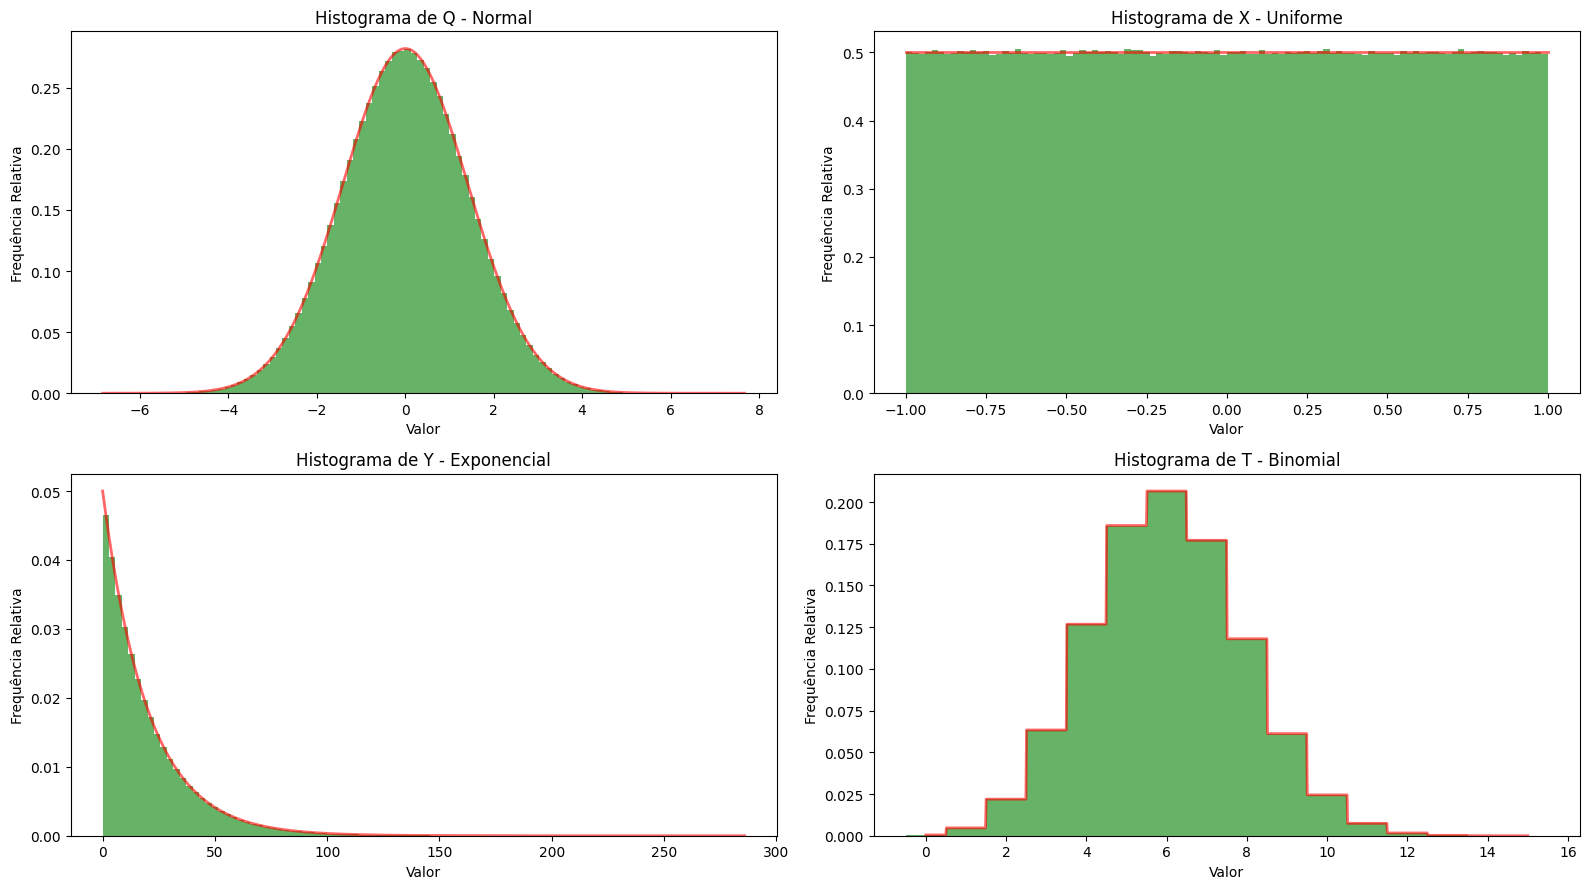

In [10]:
# Plotando os histogramas de frequência relativa
def plot_histogramas_com_curva_teorica(data_list, nomes, params):
    fig, axs = plt.subplots(2, 2, figsize=(16, 9))
    axs = axs.ravel()
    
    for i, data in enumerate(data_list):
        axs[i].set_title(f'Histograma de {nomes[i]}')
        axs[i].set_xlabel('Valor')
        axs[i].set_ylabel('Frequência Relativa')
        
        # Plotting the theoretical curve
        x = np.linspace(min(data), max(data), 1000)
        if nomes[i] == "Q - Normal":
            axs[i].hist(data, bins=100, density=True, alpha=0.6, color='g')
            pdf = norm.pdf(x, params[i][0], np.sqrt(params[i][1]))
        elif nomes[i] == "X - Uniforme":
            axs[i].hist(data, bins=100, density=True, alpha=0.6, color='g')
            pdf = uniform.pdf(x, -1, 2)
        elif nomes[i] == "Y - Exponencial":
            axs[i].hist(data, bins=100, density=True, alpha=0.6, color='g')
            pdf = expon.pdf(x, scale=params[i][0])
        elif nomes[i] == "T - Binomial":
            axs[i].hist(data, bins=np.arange(-0.5, params[i][0] + 1.5, 1), density=True, alpha=0.6, color='g')
            pdf = binom.pmf(np.round(x), params[i][0], params[i][1])
        
        axs[i].plot(x, pdf, 'r-', lw=2, alpha=0.6)
    
    plt.tight_layout()
    plt.show()

# Parâmetros teóricos
params = [(E_Q, Var_Q), (E_X, Var_X), (E_Y, Var_Y), (n_T, p_T)]

data_list = [data_q, data_x, data_y, data_t]
nomes = ["Q - Normal", "X - Uniforme", "Y - Exponencial", "T - Binomial"]

# Plotando os histogramas com curvas teóricas
plot_histogramas_com_curva_teorica(data_list, nomes, params)

Na *regra do olho* os histogramas de frequência relativa parecem estar ao encontro das curvas teóricas plotada para cada gráfico.

### (d) Cálculo de Média e Variância Amostral

In [12]:
# Calculando a média e variância amostral
def media_amostral(data, n):
    amostra = np.random.choice(data, size=n)
    return np.mean(amostra)

def variancia_amostral(data, n):
    amostra = np.random.choice(data, size=n)
    return np.var(amostra, ddof=1)

# Parâmetros de amostra
n_values = [5, 10, 50]
num_amostras = 10000

# Cálculo para cada variável e tamanho de amostra
results = {}
for n in n_values:
    medias_q, variancias_q = [], []
    medias_x, variancias_x = [], []
    medias_y, variancias_y = [], []
    medias_t, variancias_t = [], []
    for _ in range(num_amostras):
        medias_q.append(media_amostral(data_q, n))
        variancias_q.append(variancia_amostral(data_q, n))
        medias_x.append(media_amostral(data_x, n))
        variancias_x.append(variancia_amostral(data_x, n))
        medias_y.append(media_amostral(data_y, n))
        variancias_y.append(variancia_amostral(data_y, n))
        medias_t.append(media_amostral(data_t, n))
        variancias_t.append(variancia_amostral(data_t, n))
    
    results[n] = {'medias_q': medias_q, 'variancias_q': variancias_q,
                  'medias_x': medias_x, 'variancias_x': variancias_x,
                  'medias_y': medias_y, 'variancias_y': variancias_y,
                  'medias_t': medias_t, 'variancias_t': variancias_t}

### (e) Histogramas para Médias e Variâncias Amostrais

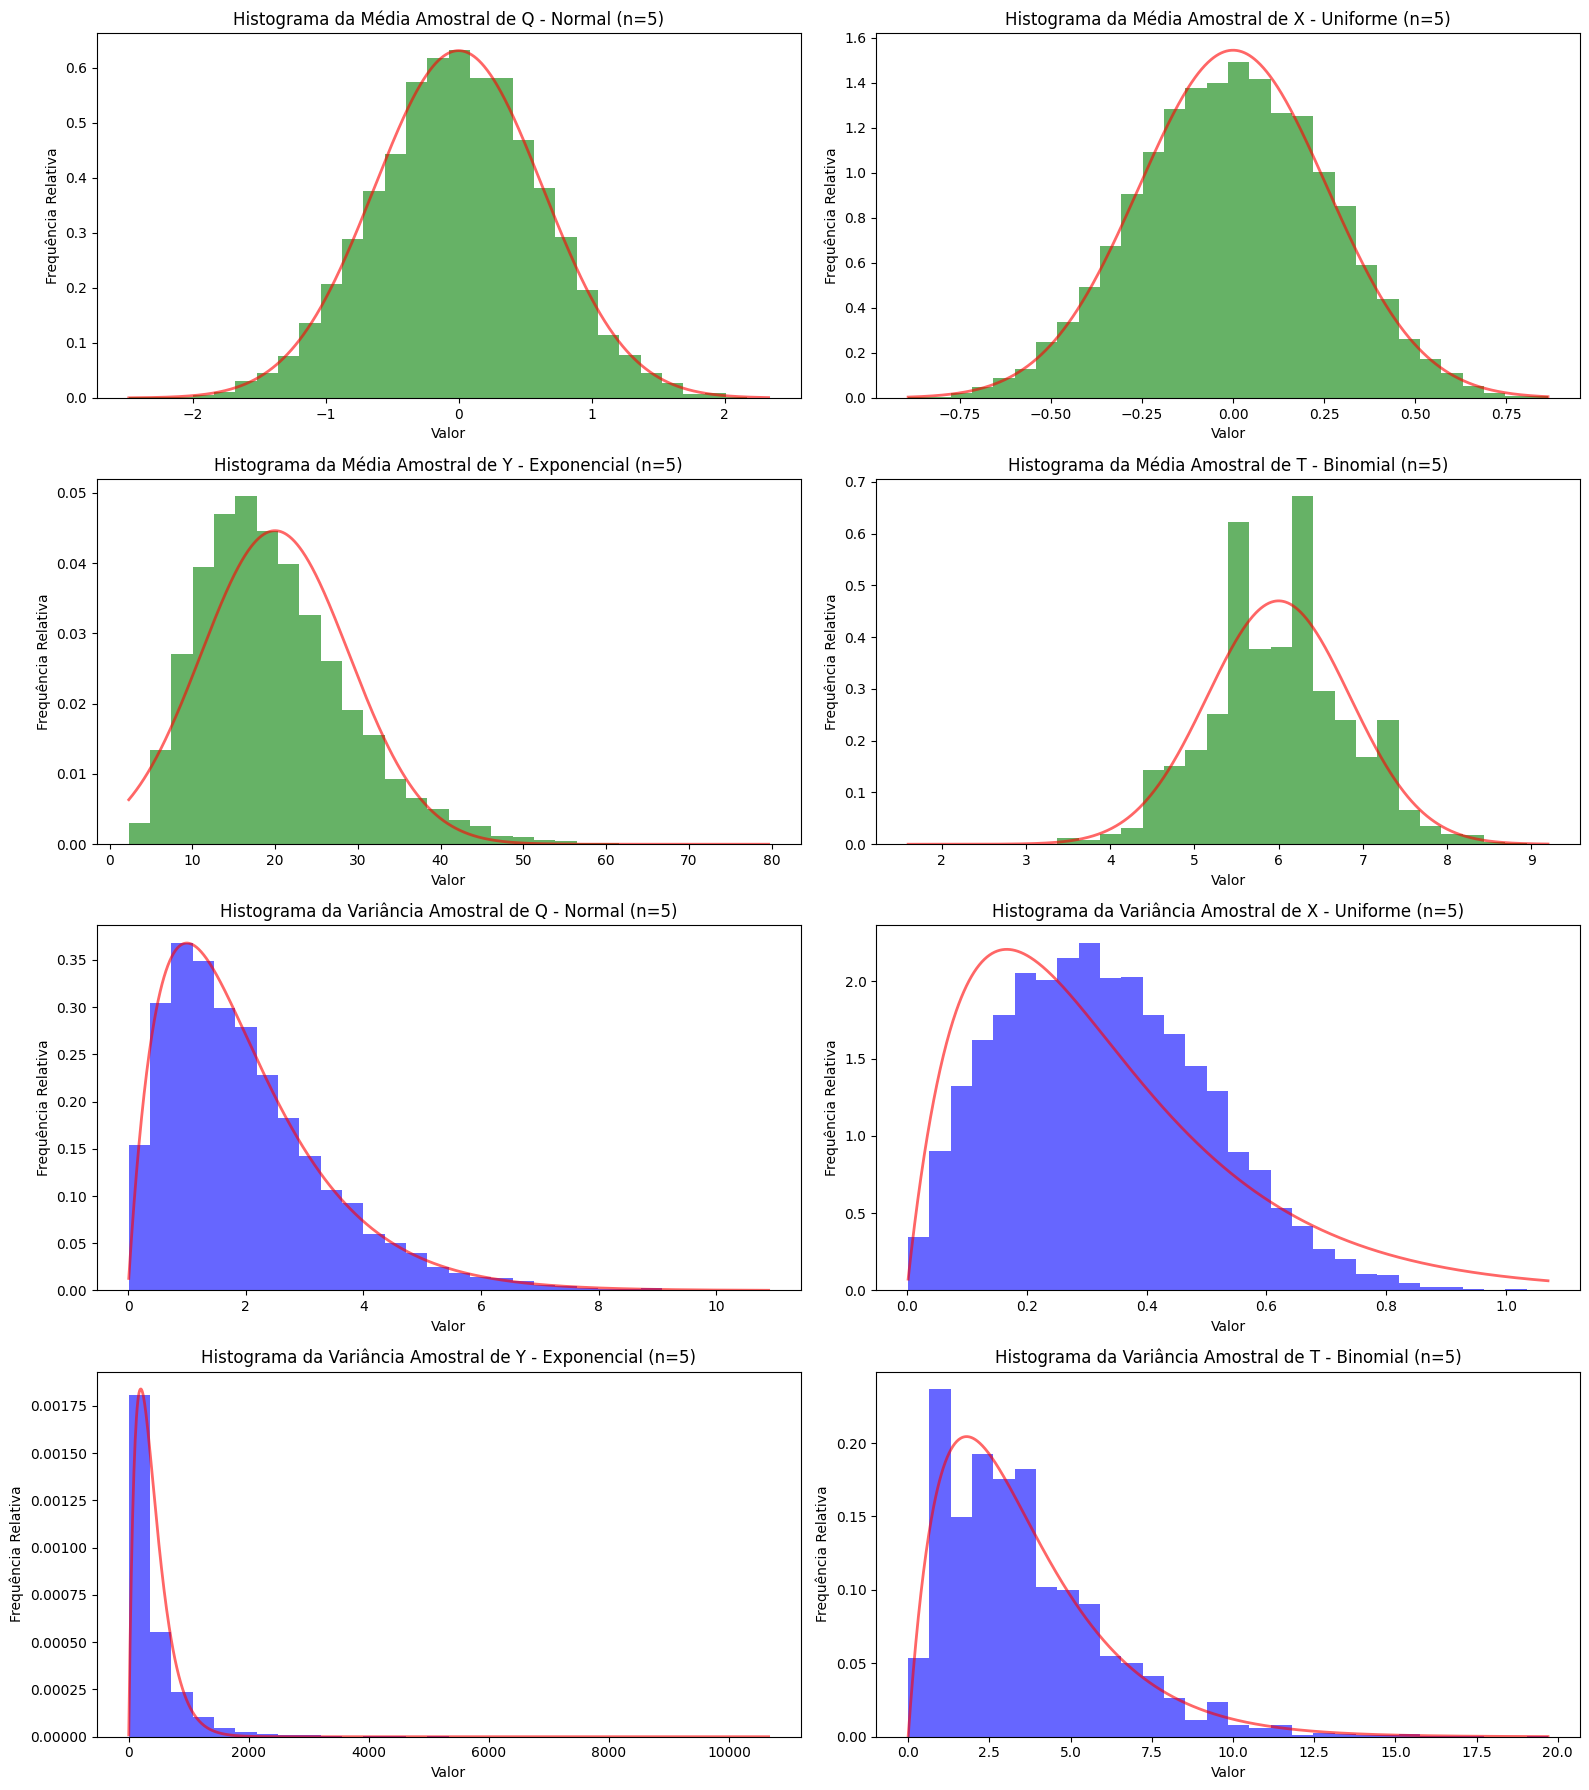

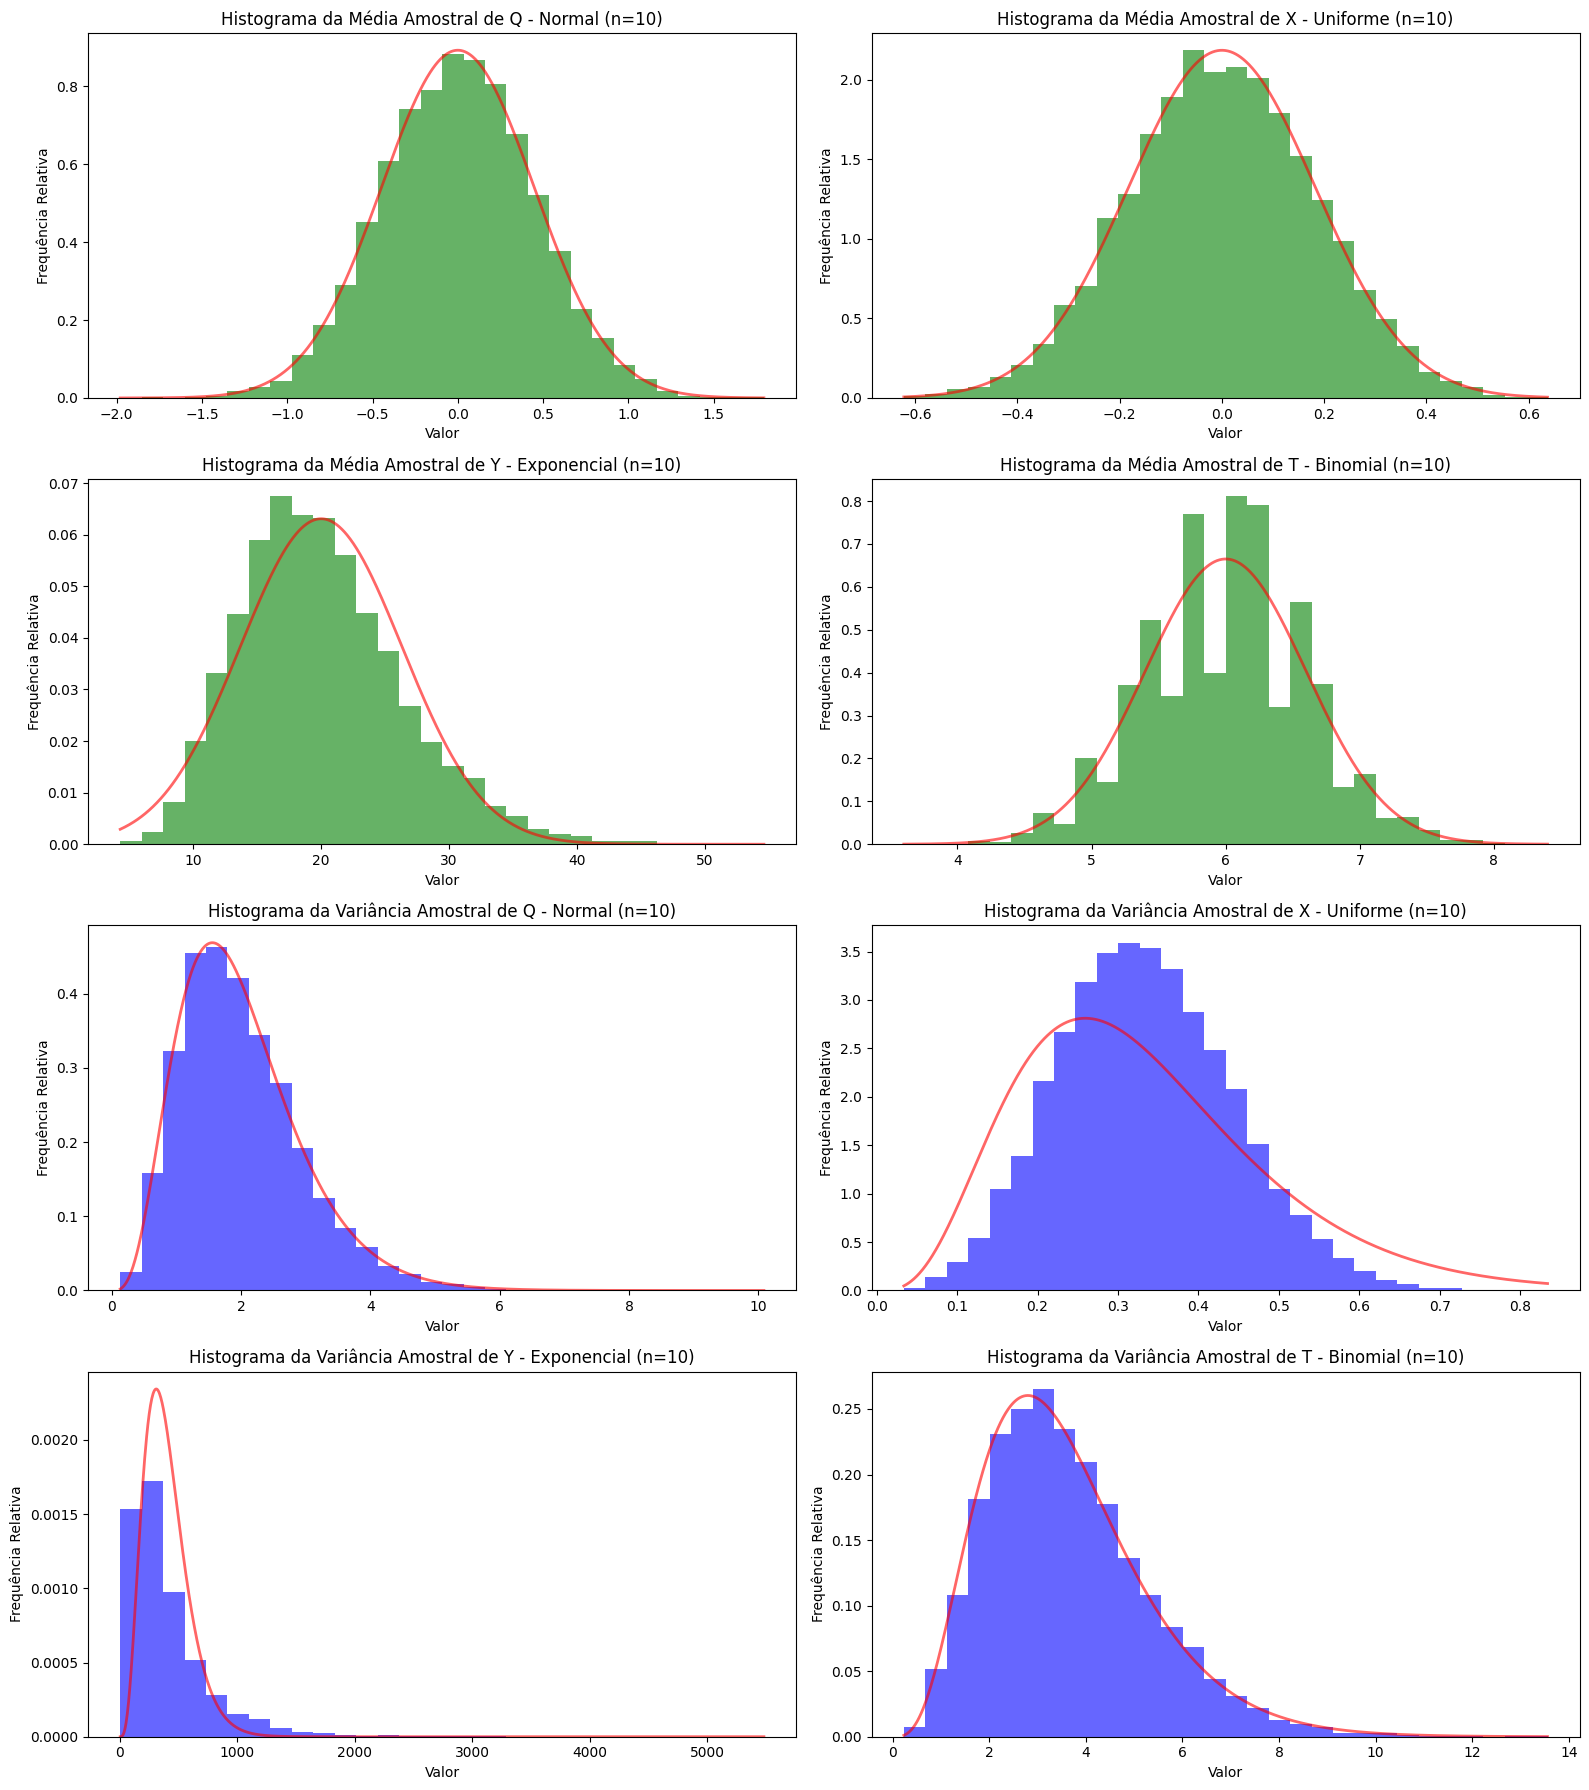

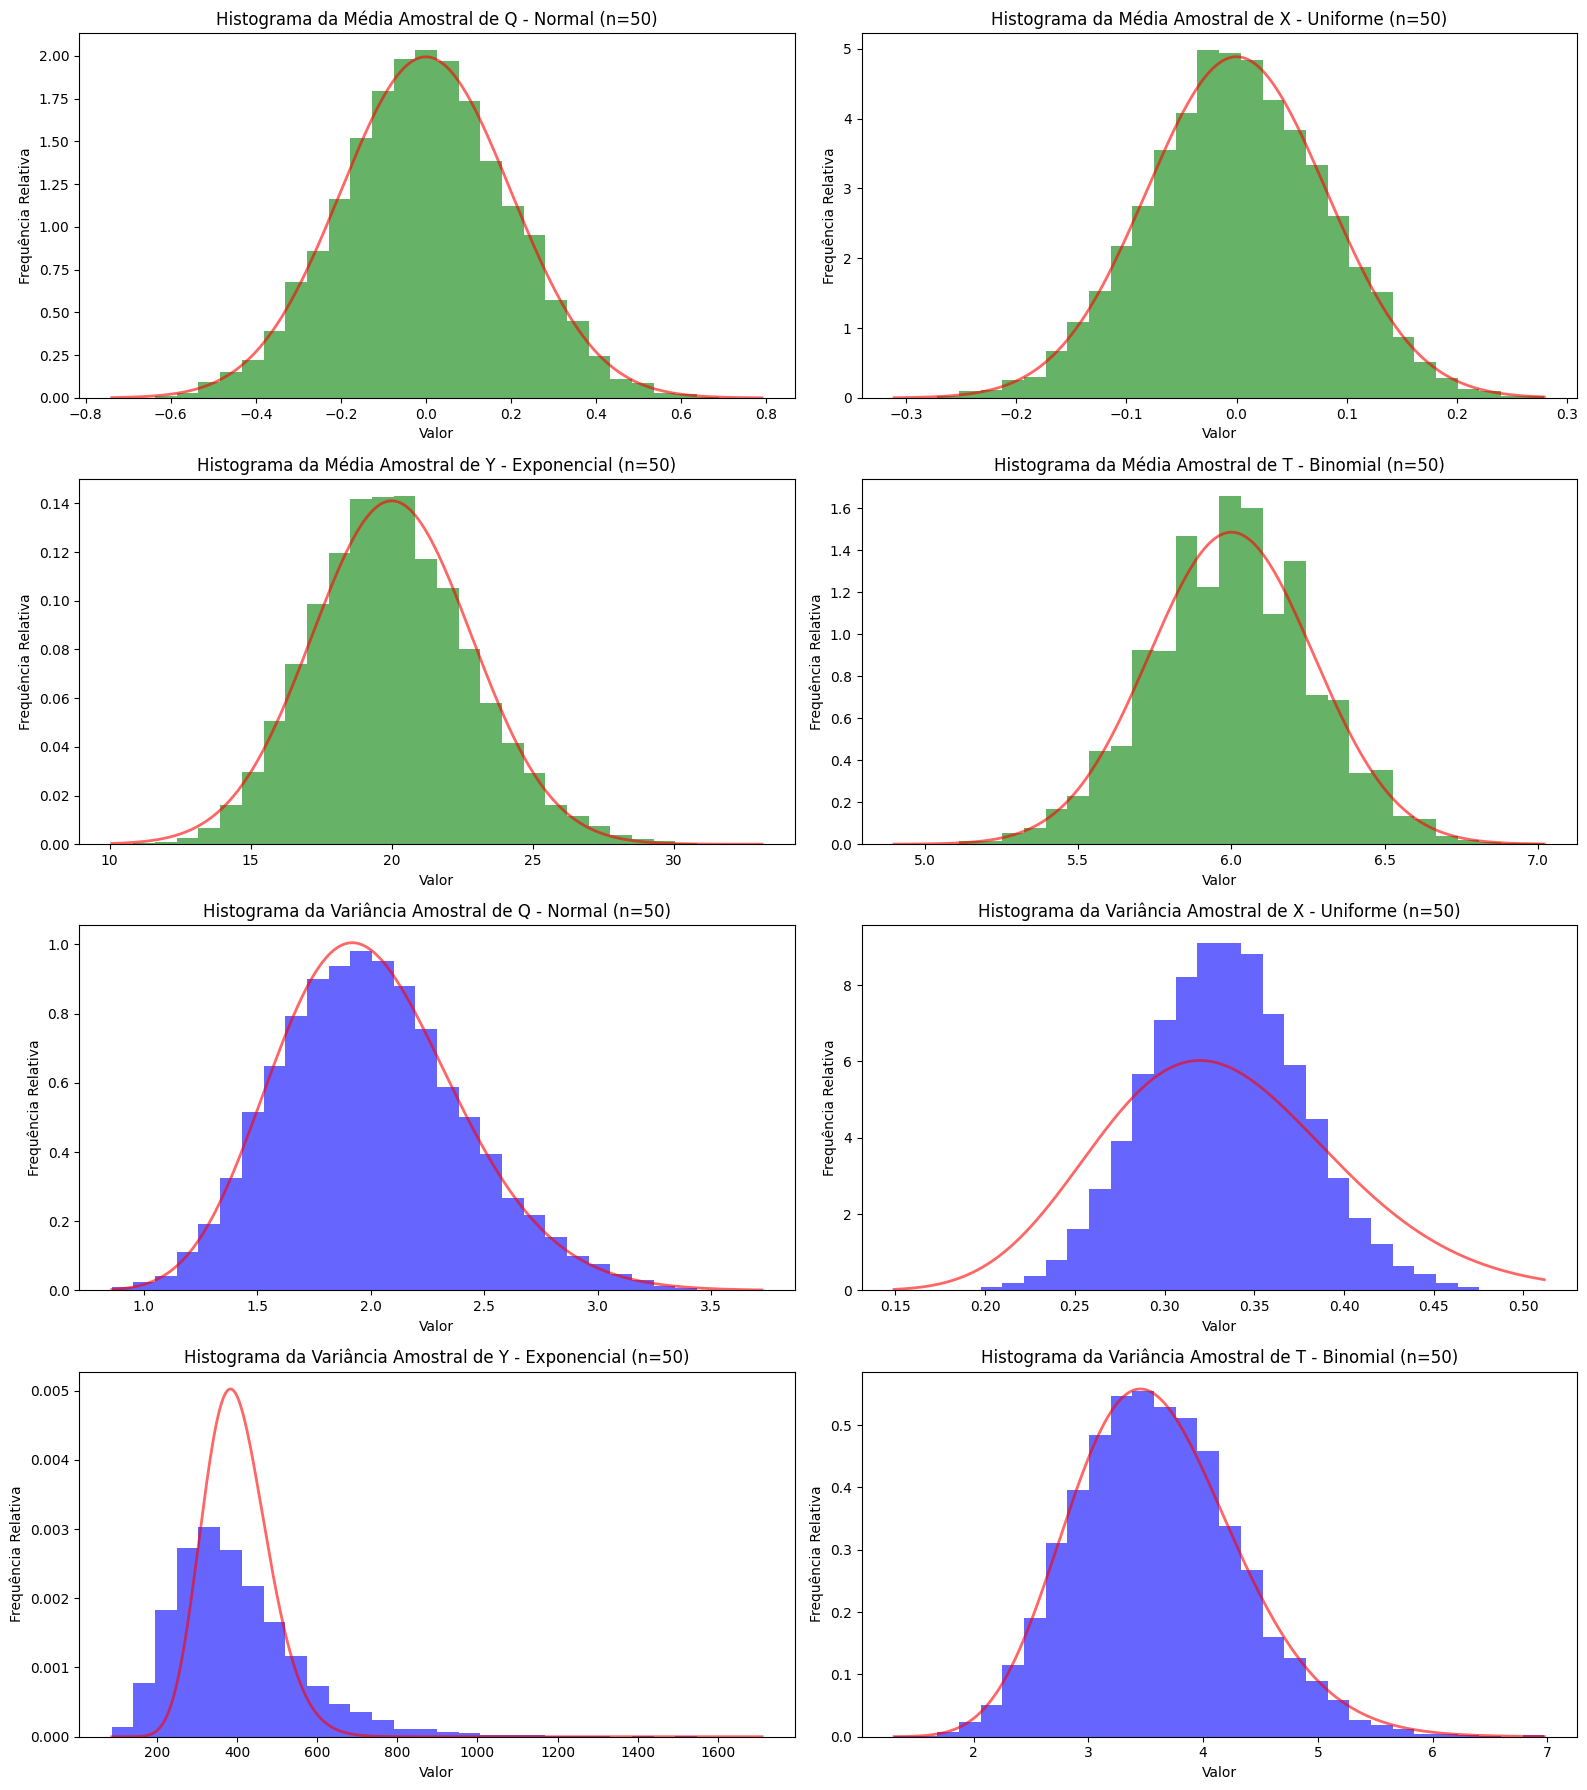

In [15]:
# Plotando histogramas de médias e variâncias amostrais com curvas teóricas
def plot_histogramas_amostrais_com_curvas_teoricas(results, nomes, params):
    for n in results:
        medias_q = results[n]['medias_q']
        medias_x = results[n]['medias_x']
        medias_y = results[n]['medias_y']
        medias_t = results[n]['medias_t']
        variancias_q = results[n]['variancias_q']
        variancias_x = results[n]['variancias_x']
        variancias_y = results[n]['variancias_y']
        variancias_t = results[n]['variancias_t']
        
        fig, axs = plt.subplots(4, 2, figsize=(16, 18))
        axs = axs.ravel()
        
        data_list_medias = [medias_q, medias_x, medias_y, medias_t]
        data_list_variancias = [variancias_q, variancias_x, variancias_y, variancias_t]
        
        for i, (data_media, data_variancia) in enumerate(zip(data_list_medias, data_list_variancias)):
            axs[i].hist(data_media, bins=30, density=True, alpha=0.6, color='g')
            axs[i].set_title(f'Histograma da Média Amostral de {nomes[i]} (n={n})')
            axs[i].set_xlabel('Valor')
            axs[i].set_ylabel('Frequência Relativa')
            
            x_media = np.linspace(min(data_media), max(data_media), 1000)
            
            pdf_media = norm.pdf(x_media, params[i][0], np.sqrt(params[i][1] / n))
            
            axs[i].plot(x_media, pdf_media, 'r-', lw=2, alpha=0.6)
            
            # Plotando histogramas e curvas teóricas para variâncias
            axs[i + 4].hist(data_variancia, bins=30, density=True, alpha=0.6, color='b')
            axs[i + 4].set_title(f'Histograma da Variância Amostral de {nomes[i]} (n={n})')
            axs[i + 4].set_xlabel('Valor')
            axs[i + 4].set_ylabel('Frequência Relativa')
            
            x_variancia = np.linspace(min(data_variancia), max(data_variancia), 1000)
            if nomes[i] == "Q - Normal":
                pdf_variancia = chi2.pdf(x_variancia * (n - 1) / params[i][1], n - 1) * (n - 1) / params[i][1]
            elif nomes[i] == "X - Uniforme":
                pdf_variancia = chi2.pdf(x_variancia * (n - 1) / params[i][1], n - 1) * (n - 1) / params[i][1]
            elif nomes[i] == "Y - Exponencial":
                pdf_variancia = chi2.pdf(x_variancia * (n - 1) / params[i][1], n - 1) * (n - 1) / params[i][1]
            elif nomes[i] == "T - Binomial":
                pdf_variancia = chi2.pdf(x_variancia * (n - 1) / params[i][1], n - 1) * (n - 1) / params[i][1]
            
            if pdf_variancia is not None:
                axs[i + 4].plot(x_variancia, pdf_variancia, 'r-', lw=2, alpha=0.6)
        
        plt.tight_layout()
        plt.show()

# Chamando a função com o dicionário results, lista de nomes e parâmetros
params = [(E_Q, Var_Q), (E_X, Var_X), (E_Y, Var_Y), (E_T, Var_T)]

nomes = ["Q - Normal", "X - Uniforme", "Y - Exponencial", "T - Binomial"]
plot_histogramas_amostrais_com_curvas_teoricas(results, nomes, params)

### (f) Comparação dos Resultados

Em relação aos histogramas de médias amostrais, todas as distribuições se comportam como normal, mesmo com n pequeno. O único destaque seriam os histogramas de médias amostrais provenientes da distribuição expoencial, que com n pequeno não se encaixam tão bem a curva teórica, mas conforme o n aumenta esse comportamento se torna menos presente. A binomial tem uma aparencia estranha mas isso vem da questão do número de bins escolhido para plotar o gráfico.

Agora, em relação aos histogramas de variâncias amostrais, apenas os histogramas com variâncias amostrais provenientes da distribuição normal poderiam ser fitados como uma $\chi2$. Porém, os histogramas provenientes da distribuição binomial se comportam de forma muito parecida com uma $\chi2$, mesmo com n pequeno. E conforme o n aumenta todas parecem estar começando a se comportar como uma $\chi2$, mas não se fitando muito bem com a curva teórica.